In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def getDF(path):
    df = pd.read_excel(path)
    times = df['Times'].tolist()
    voltage = df['Voltage'].tolist()
    return df,times,voltage

In [ ]:
def plot(times,voltage):
    plt.plot(times,voltage)

In [ ]:
def get_eachDrop(path,times,voltage):
    drop_number = 0
    voltage_mean = [abs(x) for x in voltage]
    mean = np.mean(voltage_mean)
    Drop = []
    for i in range(0,len(voltage)):
        if voltage[i] > 0.05:
            Drop.append(voltage[i])
            drop_number = drop_number+1

    Drop.sort(reverse=True)
    Drop = Drop[1:-1]
    Drop = Drop[:4]
    av = np.mean(Drop)
    Drop.append(av)

    m = path.split('-')
    Drop_Path = m[0]+'_av'+'.xlsx'
    df_drop = pd.DataFrame(Drop)
    df_drop.to_excel(Drop_Path,index = False)
    return m[0], av, Drop, Drop_Path

In [ ]:
path = r'/content/drive/MyDrive/mmEMG/rawdata/190-1.xlsx'
df,times,voltage = getDF(path)

In [ ]:
plot(times,voltage)
print(len(voltage))

In [ ]:
number = get_eachDrop2(path,times,voltage)
number

##Real time data collection

         1     2
1   83.391     0
2   83.424     0
3   83.457     0
4    83.49     0
5   83.523     0
6   83.556     0
7   83.589     0
8   83.622     0
9   83.655  0.01
10  83.688  0.01
11  83.721  0.01
12  83.754     0
13  83.787     0
14   83.82     0
15  83.853     0
16  83.886     0
17  83.919     0
18  83.952     0
19  83.985     0
20  84.018     0
21  84.051  0.14
22  84.084  0.01
23  84.117     0
24   84.15     0
25  84.183     0
26  84.216     0
27  84.249     0
28  84.282     0
29  84.315     0
30  84.348     0
31  84.381  0.01
32  84.414     0
33  84.447     0
34   84.48     0
35  84.513     0
36  84.546     0
37  84.579     0
38  84.612     0
39  84.645     0
40  84.678     0
          1     2
1   116.226     0
2   116.259     0
3   116.292     0
4   116.325     0
5   116.358     0
6   116.391     0
7   116.424     0
8   116.457     0
9    116.49     0
10  116.523     0
11  116.556     0
12  116.589     0
13  116.622     0
14  116.655     0
15  116.688     0
16  116.721    

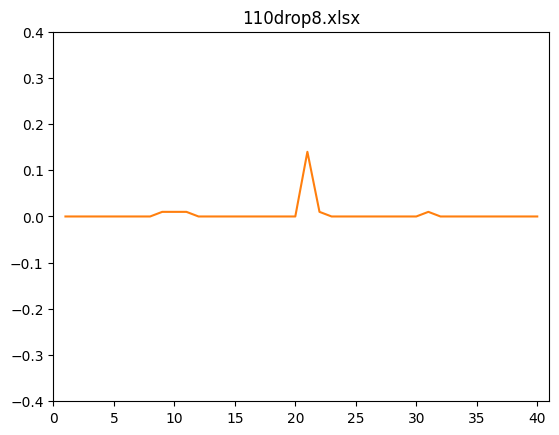

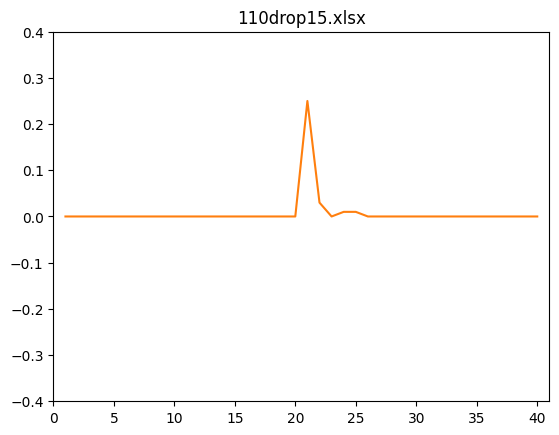

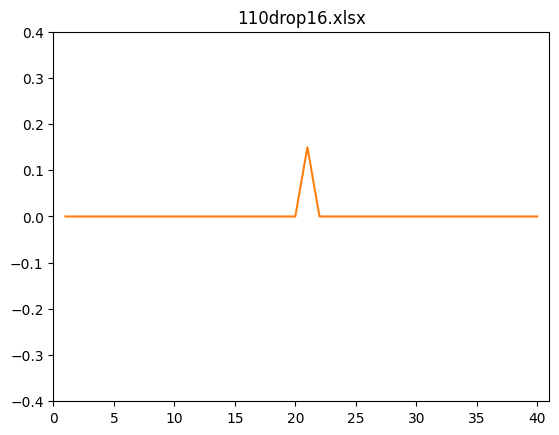

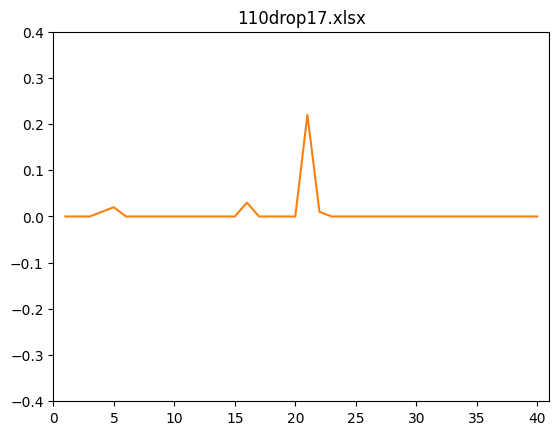

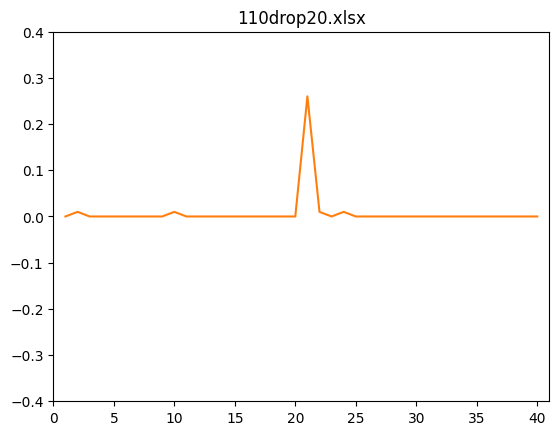

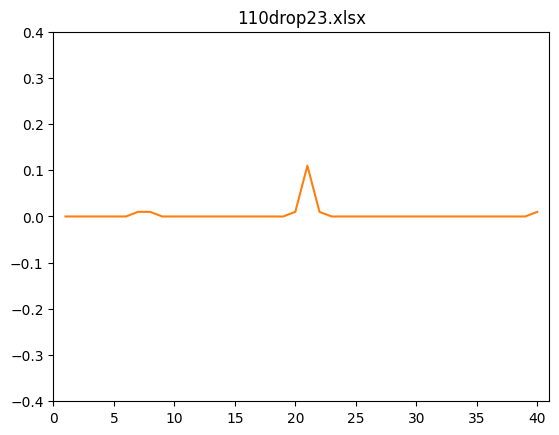

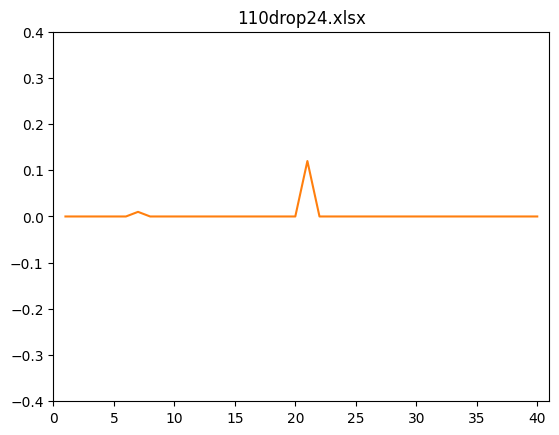

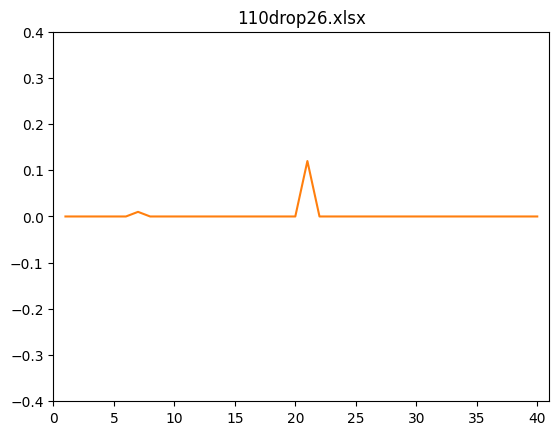

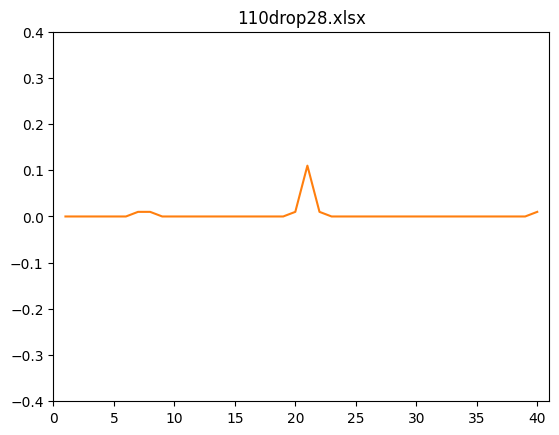

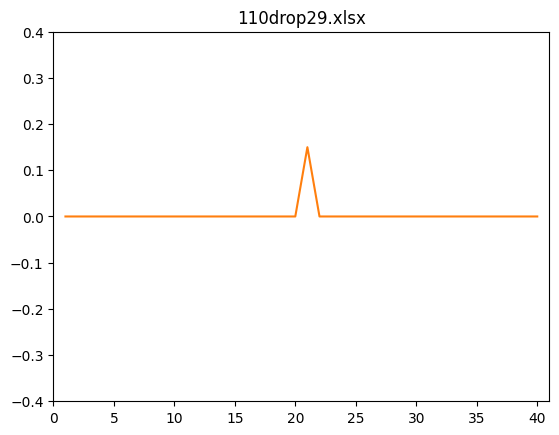

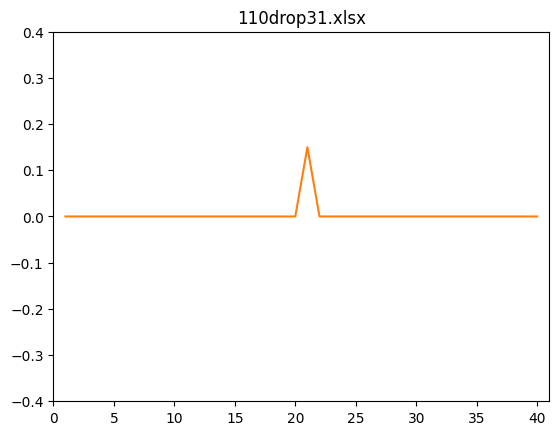

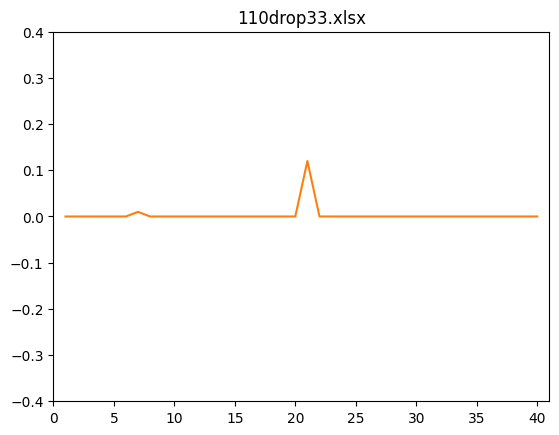

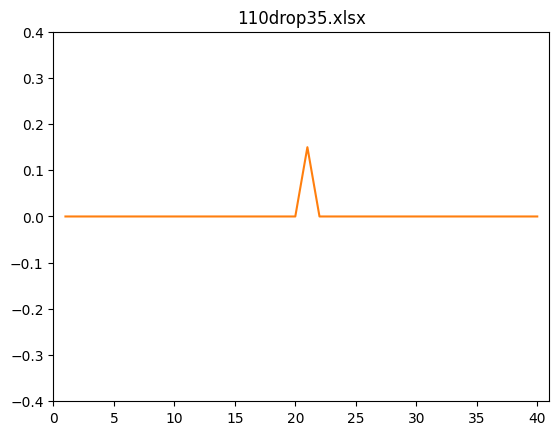

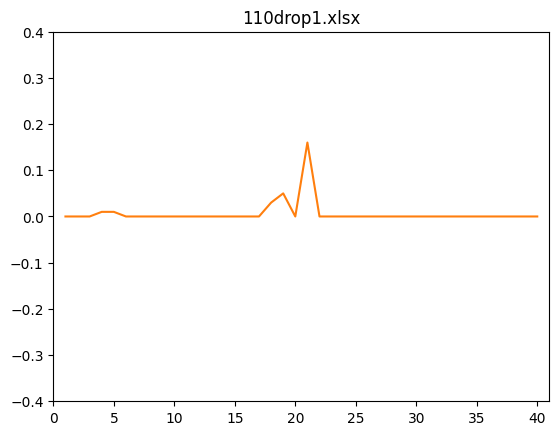

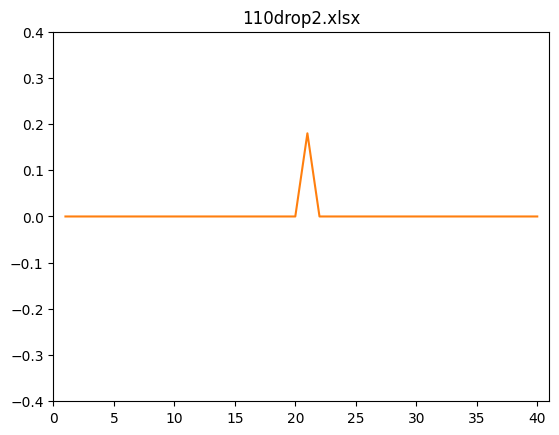

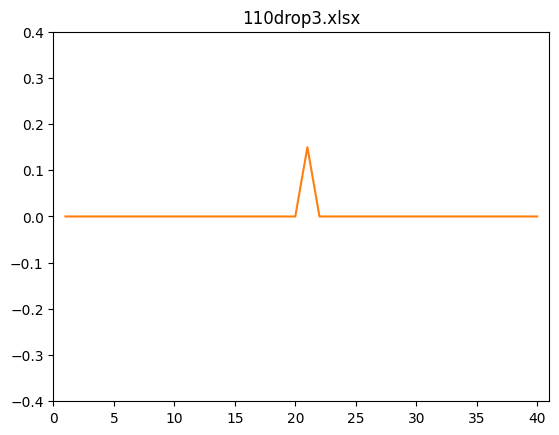

In [ ]:
#Display output voltage signals from mmEMG
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from google.colab import output

f_list_force = ['110'] #'120', '130', '140', '140', '150', '160', '170', '180', '190', '200', '210', '220']

# for i in f_list_force:
#     for j in range(10):
#         path = '/content/drive/MyDrive/mmEMG/' + i + '/'
#         file_list = os.listdir(path)
#         file_list_py = [file for file in file_list if file.endswith('xlsx')] #5 data

#         #randomly pick
#         rand_j1 = rd.choice(file_list_py)
#         rand_j2 = rd.choice(file_list_py)
#         d1 = pd.read_excel(path + rand_j1, header=None, index_col=None)
#         d1 = d1.iloc[1:41,2:3]
#         d2 = pd.read_excel(path + rand_j2, header=None, index_col=None)
#         d2 = d2.iloc[1:41,2:3]

#         time.sleep(1)
#         plt.figure()
#         plt.plot(d1,color='red', label = 'mmEMG#1')
#         plt.plot(d2,color='blue', label = 'mmEMG#2')
#         plt.title("%s" % i)
#         # plt.xlabel('Time (s)')
#         # plt.ylabel('Voltage (V)')
#         plt.axis([0,41,-0.4,0.4])
#         plt.legend()
#         plt.pause(5)
#         output.clear()

for i in f_list_force:
    path = '/content/drive/MyDrive/mmEMG/' + i + '/'
    file_list = os.listdir(path)
    file_list_py = [file for file in file_list if file.endswith('xlsx')]

    for j in file_list_py:
        d1 = pd.read_excel(path + j, header=None, index_col=None)
        d1 = d1.iloc[1:41,1:3]

        plt.figure()
        print(d1)
        plt.plot(d1)
        plt.title("%s" % i+j)
        plt.axis([0,41,-0.4,0.4])

In [ ]:
#Display output voltage signals from mmEMG
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from google.colab import output

f_list_force = ['220'] #'120', '130', '140', '140', '150', '160', '170', '180', '190', '200', '210', '220']

for i in f_list_force:
    for j in range(10):
        path = '/content/drive/MyDrive/mmEMG/' + i + '/'
        file_list = os.listdir(path)
        file_list_py = [file for file in file_list if file.endswith('xlsx')] #5 data

        #randomly pick
        rand_j1 = rd.choice(file_list_py)
        rand_j2 = rd.choice(file_list_py)
        if rand_j1 != rand_j2:
            d1 = pd.read_excel(path + rand_j1, header=None, index_col=None)
            d1 = d1.iloc[1:41,2:3]
            d2 = pd.read_excel(path + rand_j2, header=None, index_col=None)
            d2 = d2.iloc[1:41,2:3]

            time.sleep(5)
            plt.figure()
            plt.plot(d1,color='red', label = 'mmEMG#1')
            plt.plot(d2,color='blue', label = 'mmEMG#2')
            plt.title("%s" % i)
            plt.axis([0,41,-0.4,0.4])
            plt.legend()
            plt.pause(5)
            output.clear()


##closed loop control - mmEMG

Model Coefficients: [[354.36875453]]
Model Intercept: [-66.02765885]
Iteration 0: Voltage = 0.27, air pressure = 22.56, Error = 17.44


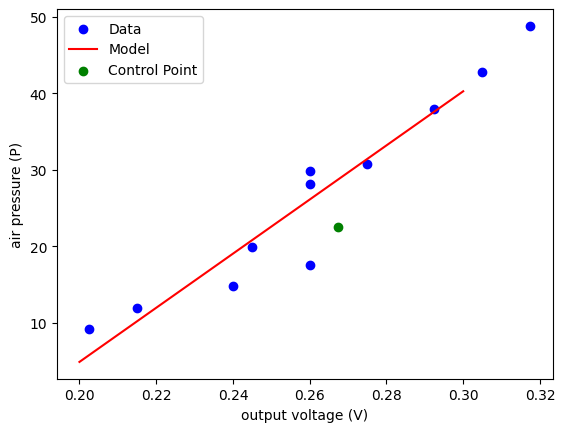

Iteration 1: Voltage = 0.28, air pressure = 28.74, Error = 11.26


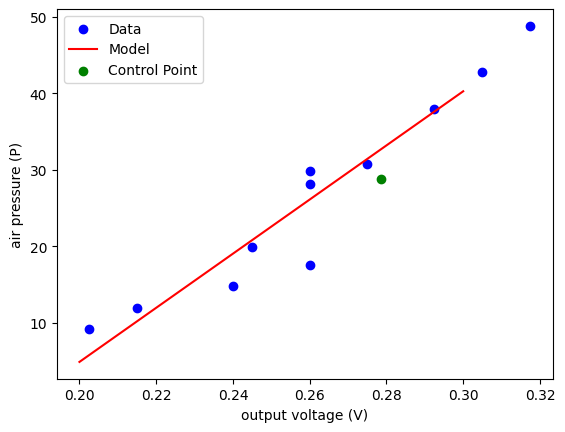

Iteration 2: Voltage = 0.29, air pressure = 32.73, Error = 7.27


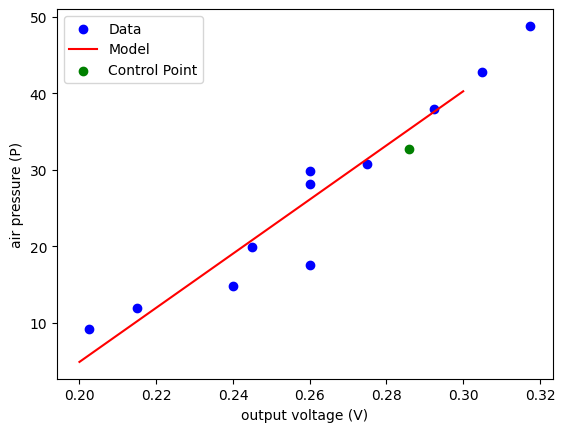

Iteration 3: Voltage = 0.29, air pressure = 35.31, Error = 4.69


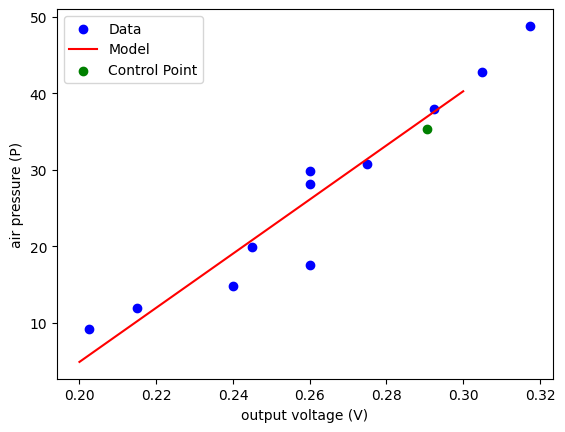

Iteration 4: Voltage = 0.29, air pressure = 36.97, Error = 3.03


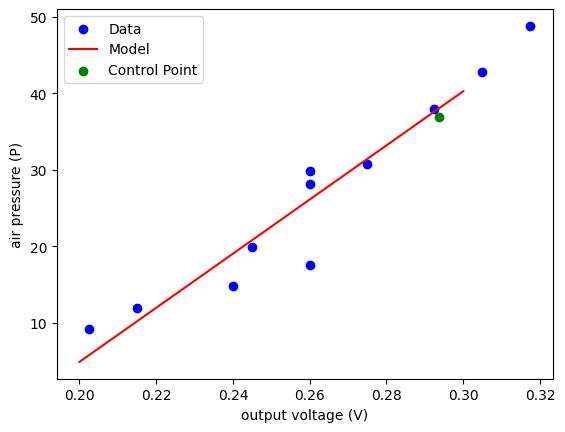

Iteration 5: Voltage = 0.30, air pressure = 38.04, Error = 1.96


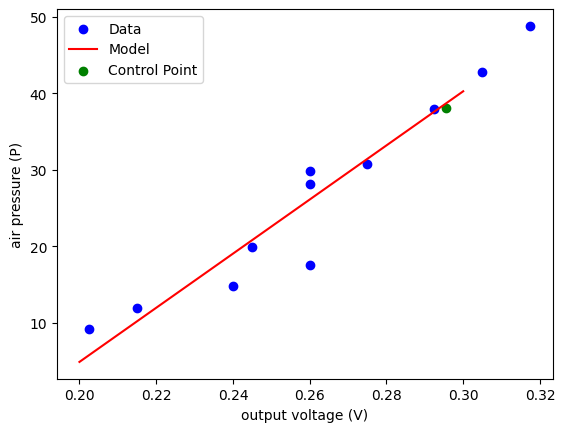

Iteration 6: Voltage = 0.30, air pressure = 38.74, Error = 1.26


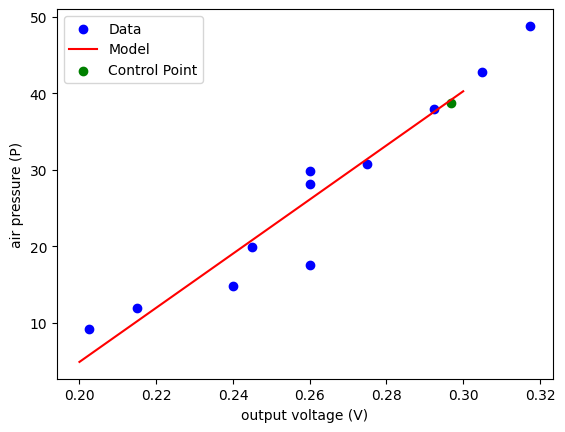

Iteration 7: Voltage = 0.30, air pressure = 39.18, Error = 0.82


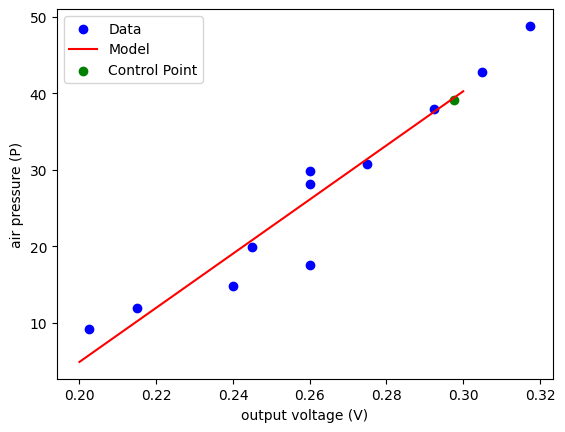

Iteration 8: Voltage = 0.30, air pressure = 39.47, Error = 0.53


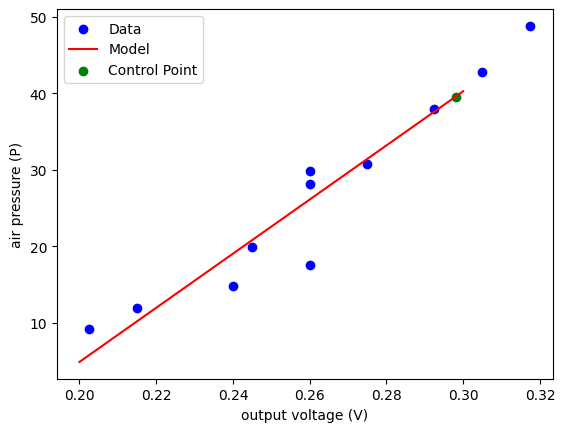

Iteration 9: Voltage = 0.30, air pressure = 39.66, Error = 0.34


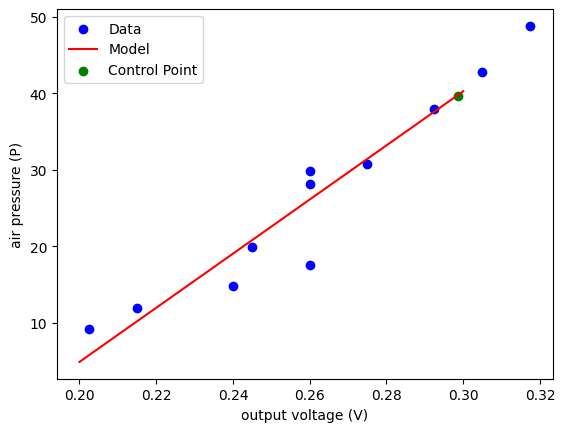

Iteration 10: Voltage = 0.30, air pressure = 39.78, Error = 0.22


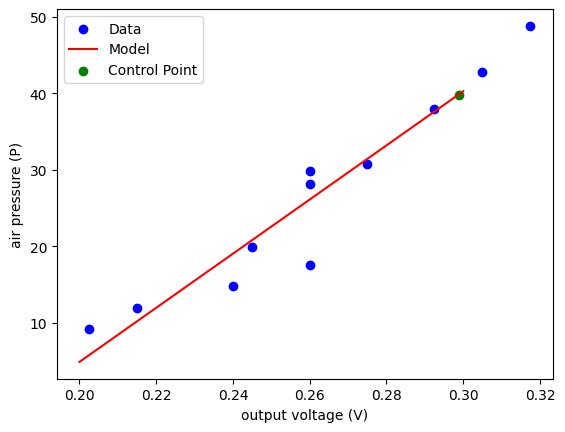

Iteration 11: Voltage = 0.30, air pressure = 39.86, Error = 0.14


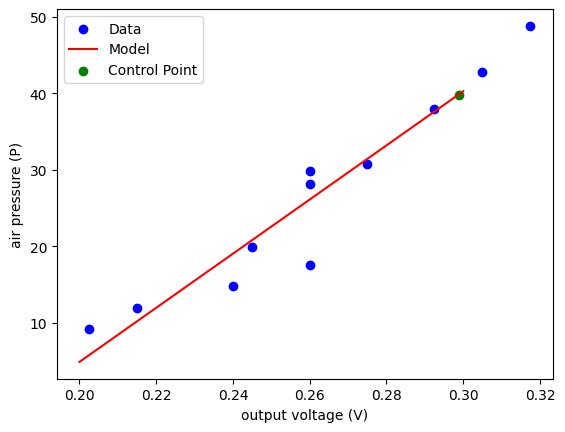

Desired air pressure reached: 39.91 kPa in 12 iterations.


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Acquring Data
# our system: air pressure (P) depends on output voltage (V)
np.random.seed(0)

V = np.array([[0.2025],[0.215],[0.24],[0.26],[0.245],[0.26],[0.26],[0.275],[0.2925],[0.305],[0.3175]])  # Control input (output voltage)
# V = np.array([[0.2025],[0.215],[0.24],[0.26],[0.245],[0.26],[0.26],[0.275],[0.3225],[0.305],[0.2925],[0.3175]])
P = np.array([[9.11],[11.91],[14.80],[17.60],[19.83],[28.08],[29.84],[30.74],[38.00],[42.87],[48.84]])   # Output (air pressure) with some noise

# Step 2: Train a Linear Regression Model
model = LinearRegression()
model.fit(V, P)

# Display the model parameters
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

# Step 3: Implement the Control Loop
# Desired setpoint air pressure
P_setpoint = [40]

# Initial control input
V_current = np.array([[0.25]])

# Control loop parameters
learning_rate = 0.001  # How aggressively we adjust the control input
tolerance = 0.1  # Acceptable error margin for the air pressure
max_iterations = 100

# Control loop
for iteration in range(max_iterations):
    # Predict the current air pressure
    P_current = model.predict(V_current)

    # Calculate error
    error = P_setpoint - P_current

    # Check if error is within the tolerance
    if abs(error) < tolerance:
        print(f"Desired air pressure reached: {P_current[0][0]:.2f} kPa in {iteration} iterations.")
        break

    # Adjust the control input based on the error
    V_current += learning_rate * error
    print(f"Iteration {iteration}: Voltage = {V_current[0][0]:.2f}, air pressure = {P_current[0][0]:.2f}, Error = {error[0][0]:.2f}")

    # Plot results
    V_test = np.linspace(0.2, 0.3, 100).reshape(-1, 1)
    P_test = model.predict(V_test)

    time.sleep(1)
    plt.scatter(V, P, color='blue', label='Data')
    plt.plot(V_test, P_test, color='red', label='Model')
    plt.scatter(V_current, P_current, color='green', label='Control Point')
    plt.xlabel('output voltage (V)')
    plt.ylabel('air pressure (P)')
    plt.legend()
    plt.show()



